In [5]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00


In [6]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = token

In [7]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 5000,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature":0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

In [8]:
output = llm.invoke("what is mean of the machine learning")
print(output)

Machine learning is a subset of artificial intelligence (AI) that involves the development of algorithms and statistical models that enable computers to perform tasks without explicit programming. Instead, these models learn patterns from data, allowing them to make predictions or decisions based on new, unseen data. The process involves training a model using a dataset, where the model learns to map inputs to outputs. There are several types of machine learning:

1. **Supervised Learning**: The model learns from labeled data, i.e., input data with corresponding output or target values. The goal is to learn a mapping function from inputs to outputs. Common supervised learning tasks include classification (predicting categorical outputs) and regression (predicting continuous outputs).

2. **Unsupervised Learning**: Here, the model learns from unlabeled data, i.e., input data without corresponding output values. The goal is often to find patterns, structures, or groupings within the data

In [9]:
output = llm.invoke("what is mean of the machine learning")
print(output)

Machine learning is a subset of artificial intelligence that involves the creation of algorithms enabling computer systems to learn and make decisions based on data, rather than being explicitly programmed for each task. It involves training a model on a dataset, allowing it to identify patterns and make predictions or decisions without human intervention. Machine learning can be categorized into supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning.


In [10]:
datalist = [1,3,5,7,9]

In [11]:
data = [
    "With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.",
    "Known for his lightning-fast footwork on the field, Antony Mateus plays professionally as a football player. He's 25, and already considered one of the rising stars in his league.",
    "The name Barack Obama is etched in history. Now 63, the former president continues to inspire through his speeches and books.",
    "After years behind bars, Lucia is back on the streets of Vice City at 29. She is ready to reclaim her life, navigating crime and chaos as a fierce criminal in the heart of GTA 6.",
    "Selling out stadiums across the world, Taylor Swift is far more than just a 34-year-old singer. Her influence spans music, fashion, and culture."
]



In [12]:
for row in data:
  print("Review:")
  print(row)
  print()
  prompt = f"""Extract data from sentence below.
  Respond JSON format :
  name
  age
  job
  {row}
  """
  print("Prompt:")
  print(prompt)
  print()

  output = llm.invoke(prompt)
  print("Output:")
  print(output)
  print()
  print()
  print("---------------------------------")


Review:
With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.

Prompt:
Extract data from sentence below.
  Respond JSON format :
  name
  age
  job
  With millions of fans watching his every move as IShowSpeed, Darren Watkins Jr. has made a name for himself as a streamer. At just 19 years old, his online presence is growing rapidly.
  

Output:
{
  "name": "Darren Watkins Jr.",
  "age": "19",
  "job": "streamer"
}


---------------------------------
Review:
Known for his lightning-fast footwork on the field, Antony Mateus plays professionally as a football player. He's 25, and already considered one of the rising stars in his league.

Prompt:
Extract data from sentence below.
  Respond JSON format :
  name
  age
  job
  Known for his lightning-fast footwork on the field, Antony Mateus plays professionally as a football player. He's 25, and already considere

In [13]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 5.6 MB/s eta 0:00:00


In [26]:
import pandas as pd

df = pd.read_csv('archive.zip')
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,leadership,risk_taking,public_speaking_comfort,curiosity,routine_preference,excitement_seeking,friendliness,emotional_stability,planning,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,0.000000,8.486191,6.888588,8.618033,5.514367,4.247436,8.916668,8.370776,4.919931,4.426422,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,4.530322,6.214742,4.877224,5.018526,6.170892,6.304219,6.494122,9.127521,4.585075,4.604019,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,7.092078,3.034192,4.312376,6.474164,6.179085,4.930449,4.054730,7.602897,5.651975,6.269467,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,5.232694,10.000000,8.203100,7.269755,5.477594,2.284054,9.442942,10.000000,6.622884,5.566069,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,6.378051,4.452973,2.456879,2.779744,5.138220,7.043162,4.149461,4.628954,5.283958,4.711944,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [22]:
!pip install -U langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.9 MB/s eta 0:00:00


In [30]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
import pandas as pd

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,
)



> Entering new AgentExecutor chain...
Thought: To answer this question, I need to calculate the average online social media usage for Extroverts, Ambiverts, and Introverts. I will use pandas' `groupby` function to categorize the individuals and then compute the mean. For visualization, I will use a bar chart with seaborn or matplotlib.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already defined as the given DataFrame

# Calculate the average online social media usage per personality type
avg_usage = df.groupby('personality_type')['online_social_usage'].mean()

# Print the results
print(avg_usage)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_usage.index, y=avg_usage.values)
plt.title('Average Online Social Media Usage by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Average Usage')
plt.xticks(rotation=45)
plt.show()
```



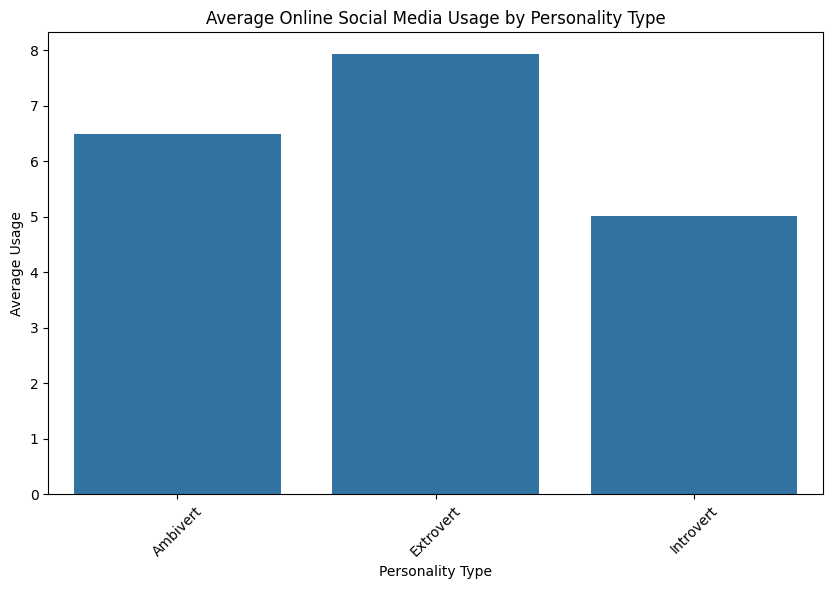

personality_type
Ambivert     6.483922
Extrovert    7.929156
Introvert    5.020158
Name: online_social_usage, dtype: float64


ModelError: Director: unexpected error handling prediction (E9243)

In [36]:
agent.invoke({'input':'who consumes more online social media usage. and make a visualization average between extrovert, introvert and ambivert who consumes the most online social media usage'})